In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fits_library import *
from scipy.optimize import curve_fit

$$\text{Malus's Law}$$

In [2]:
#
theta = np.arange(0, 361, 2) * (np.pi/180)
#in mA
intensity = np.array([26.6, 26.6, 26.6, 26.5, 26.5, 26.5, 26.5, 26.5, 26.4, 26.3, 26.3, 26.2, 26.1, 26, 26, 25.8, 25.7, 25.6, 25.5, 25.4, 
                      25.1, 24.7, 24.5, 24.3, 24, 23.6, 23.1, 22.3, 21.4, 20.1, 18.8, 17.2, 16.1, 15.3, 13.3, 12.5, 11.5, 
                      10.5, 9.2, 7.2, 6.3, 5.1, 4.2, 3.3, 2.3, 1.5, 0.9, 0.5, 0.2, 0, 0, 0.1, 0.2, 0.6, 1.1, 2.4, 3.4, 4.6, 
                      5.7, 6.9, 8.7, 10.2, 10.9, 12.3, 13.6, 14.8, 15.9, 17, 18.5, 20.5, 22, 22.5, 23.2, 23.5, 23.9, 24.2, 24.4, 24.6, 24.9, 25.2, 25.4, 
                      25.7, 26, 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.6, 26.6, 26.6, 26.6, 26.6, 26.6, 26.5, 26.4, 26.4, 26.4, 26.5, 26.5, 26.4, 
                      26.4, 26.3, 26.1, 25.9, 25.7, 25.4, 25.3, 25.2, 25, 24.8, 24.6, 24.3, 24.2, 24, 23.7, 23.3, 22.1, 21.4, 19.6, 18.5, 
                      17, 15.4, 14, 12.7, 11.2, 9.5, 8.2, 6.9, 5.6, 4.1, 3.5, 2.6, 1.6, 0.9, 0.6, 0.1, 0, 0, 0, 0.2, 0.6, 
                      0.9, 1.5, 2.6, 3.4, 4.1, 6.2, 7.4, 8.8, 10.8, 12, 13.4, 15.9, 17.5, 18.9, 20.8, 21.8, 22.8, 23.1, 23.4, 23.6, 23.9, 24.3,
                      24.7, 25, 25.1, 25.4, 25.4, 25.5, 25.7, 25.9, 26, 26.4, 26.5, 26.6, 26.6, 26.7, 26.7, 26.7])

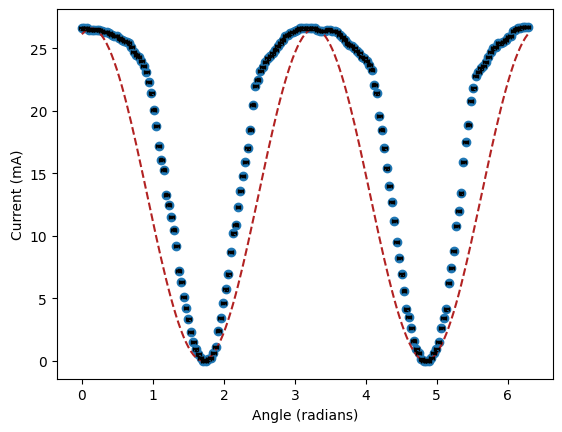

In [3]:
#curve fitting a cos^2(theta) graph to the data above to get I0

I0 = 26.6

def malus(angle, c):
    return I0 * (np.cos(angle + c) ** 2)

params, covariance = curve_fit(malus, theta, intensity, maxfev = 5000)

phase = params[0]

plt.scatter(theta, intensity, label = 'Data')
plt.plot(theta, malus(theta, phase), '--', color = 'firebrick', label = 'Fitted Curve')
plt.errorbar(theta, intensity, xerr = 2 * np.pi/180, yerr = 0.1, ls = 'none', color = 'k', capsize = 1.5)
plt.xlabel("Angle (radians)")
plt.ylabel("Current (mA)")
plt.savefig("malus.png")
plt.show()

In [4]:
#R^2 coefficient calculation for intensity

corr_matrix = np.corrcoef(intensity, malus(theta, phase))
R_sq = corr_matrix[0][1] ** 2
print(R_sq)

0.8694640796183777


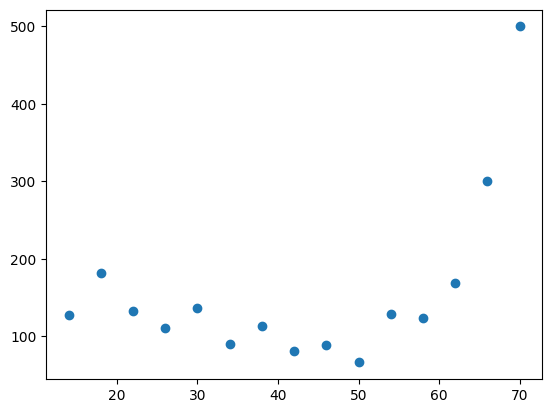

In [5]:
zero = 220
#without polarizer attached

theta_brewster1 = np.arange(14, 91, 4) 
intensity_brewster1 = np.array([127.3, 182.1, 132.4, 111.3, 136.9, 90, 113.9, 81.6, 89.3, 66.2, 128.5, 123.7, 168.6, 300, 500]) #in microAmpere

plt.scatter(theta_brewster1[:len(intensity_brewster1)], intensity_brewster1)
plt.show()

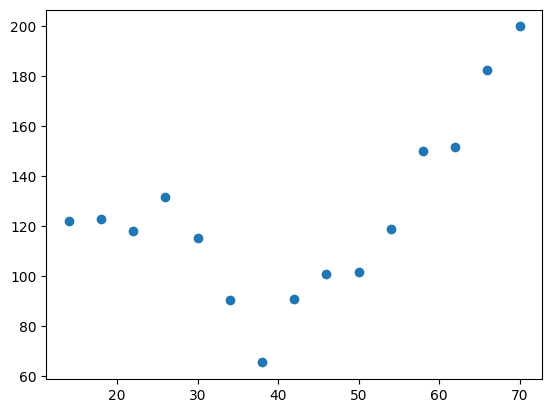

In [6]:
#2nd try correct try

theta_brewster1 = np.arange(14, 91, 4)
intensity_brewster1 = np.array([122.2, 122.7, 118.2, 131.7, 115.3, 90.5, 65.3, 90.8, 100.9, 101.5, 119, 150.2, 151.5, 182.6, 200]) #in microAmpere

plt.scatter(theta_brewster1[:len(intensity_brewster1)], intensity_brewster1)
plt.show()

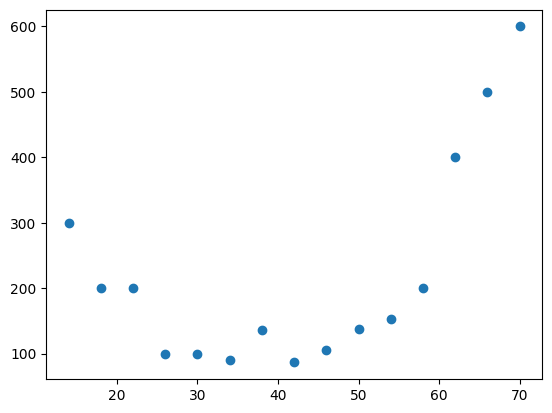

In [7]:
#with polarizer

theta_brewster2 = np.arange(14, 91, 4)
intensity_brewster2 = np.array([300, 200, 200, 100, 100, 90.1, 136.7, 86.5, 105, 137.5, 152.2, 200, 400, 500, 600]) #mA

plt.scatter(theta_brewster2[:len(intensity_brewster2)], intensity_brewster2)
plt.show()